In [1]:

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
col_names = list(data.columns)


In [8]:
def plot_distributions(df):
    for i in col_names:
        plt.rcParams['figure.figsize'] = (10,8)
        plt.hist(df[i])
        plt.title(f'Distribution of {i}')
        plt.xlabel(i,fontsize = 20)
        
        plt.show()
    return
    

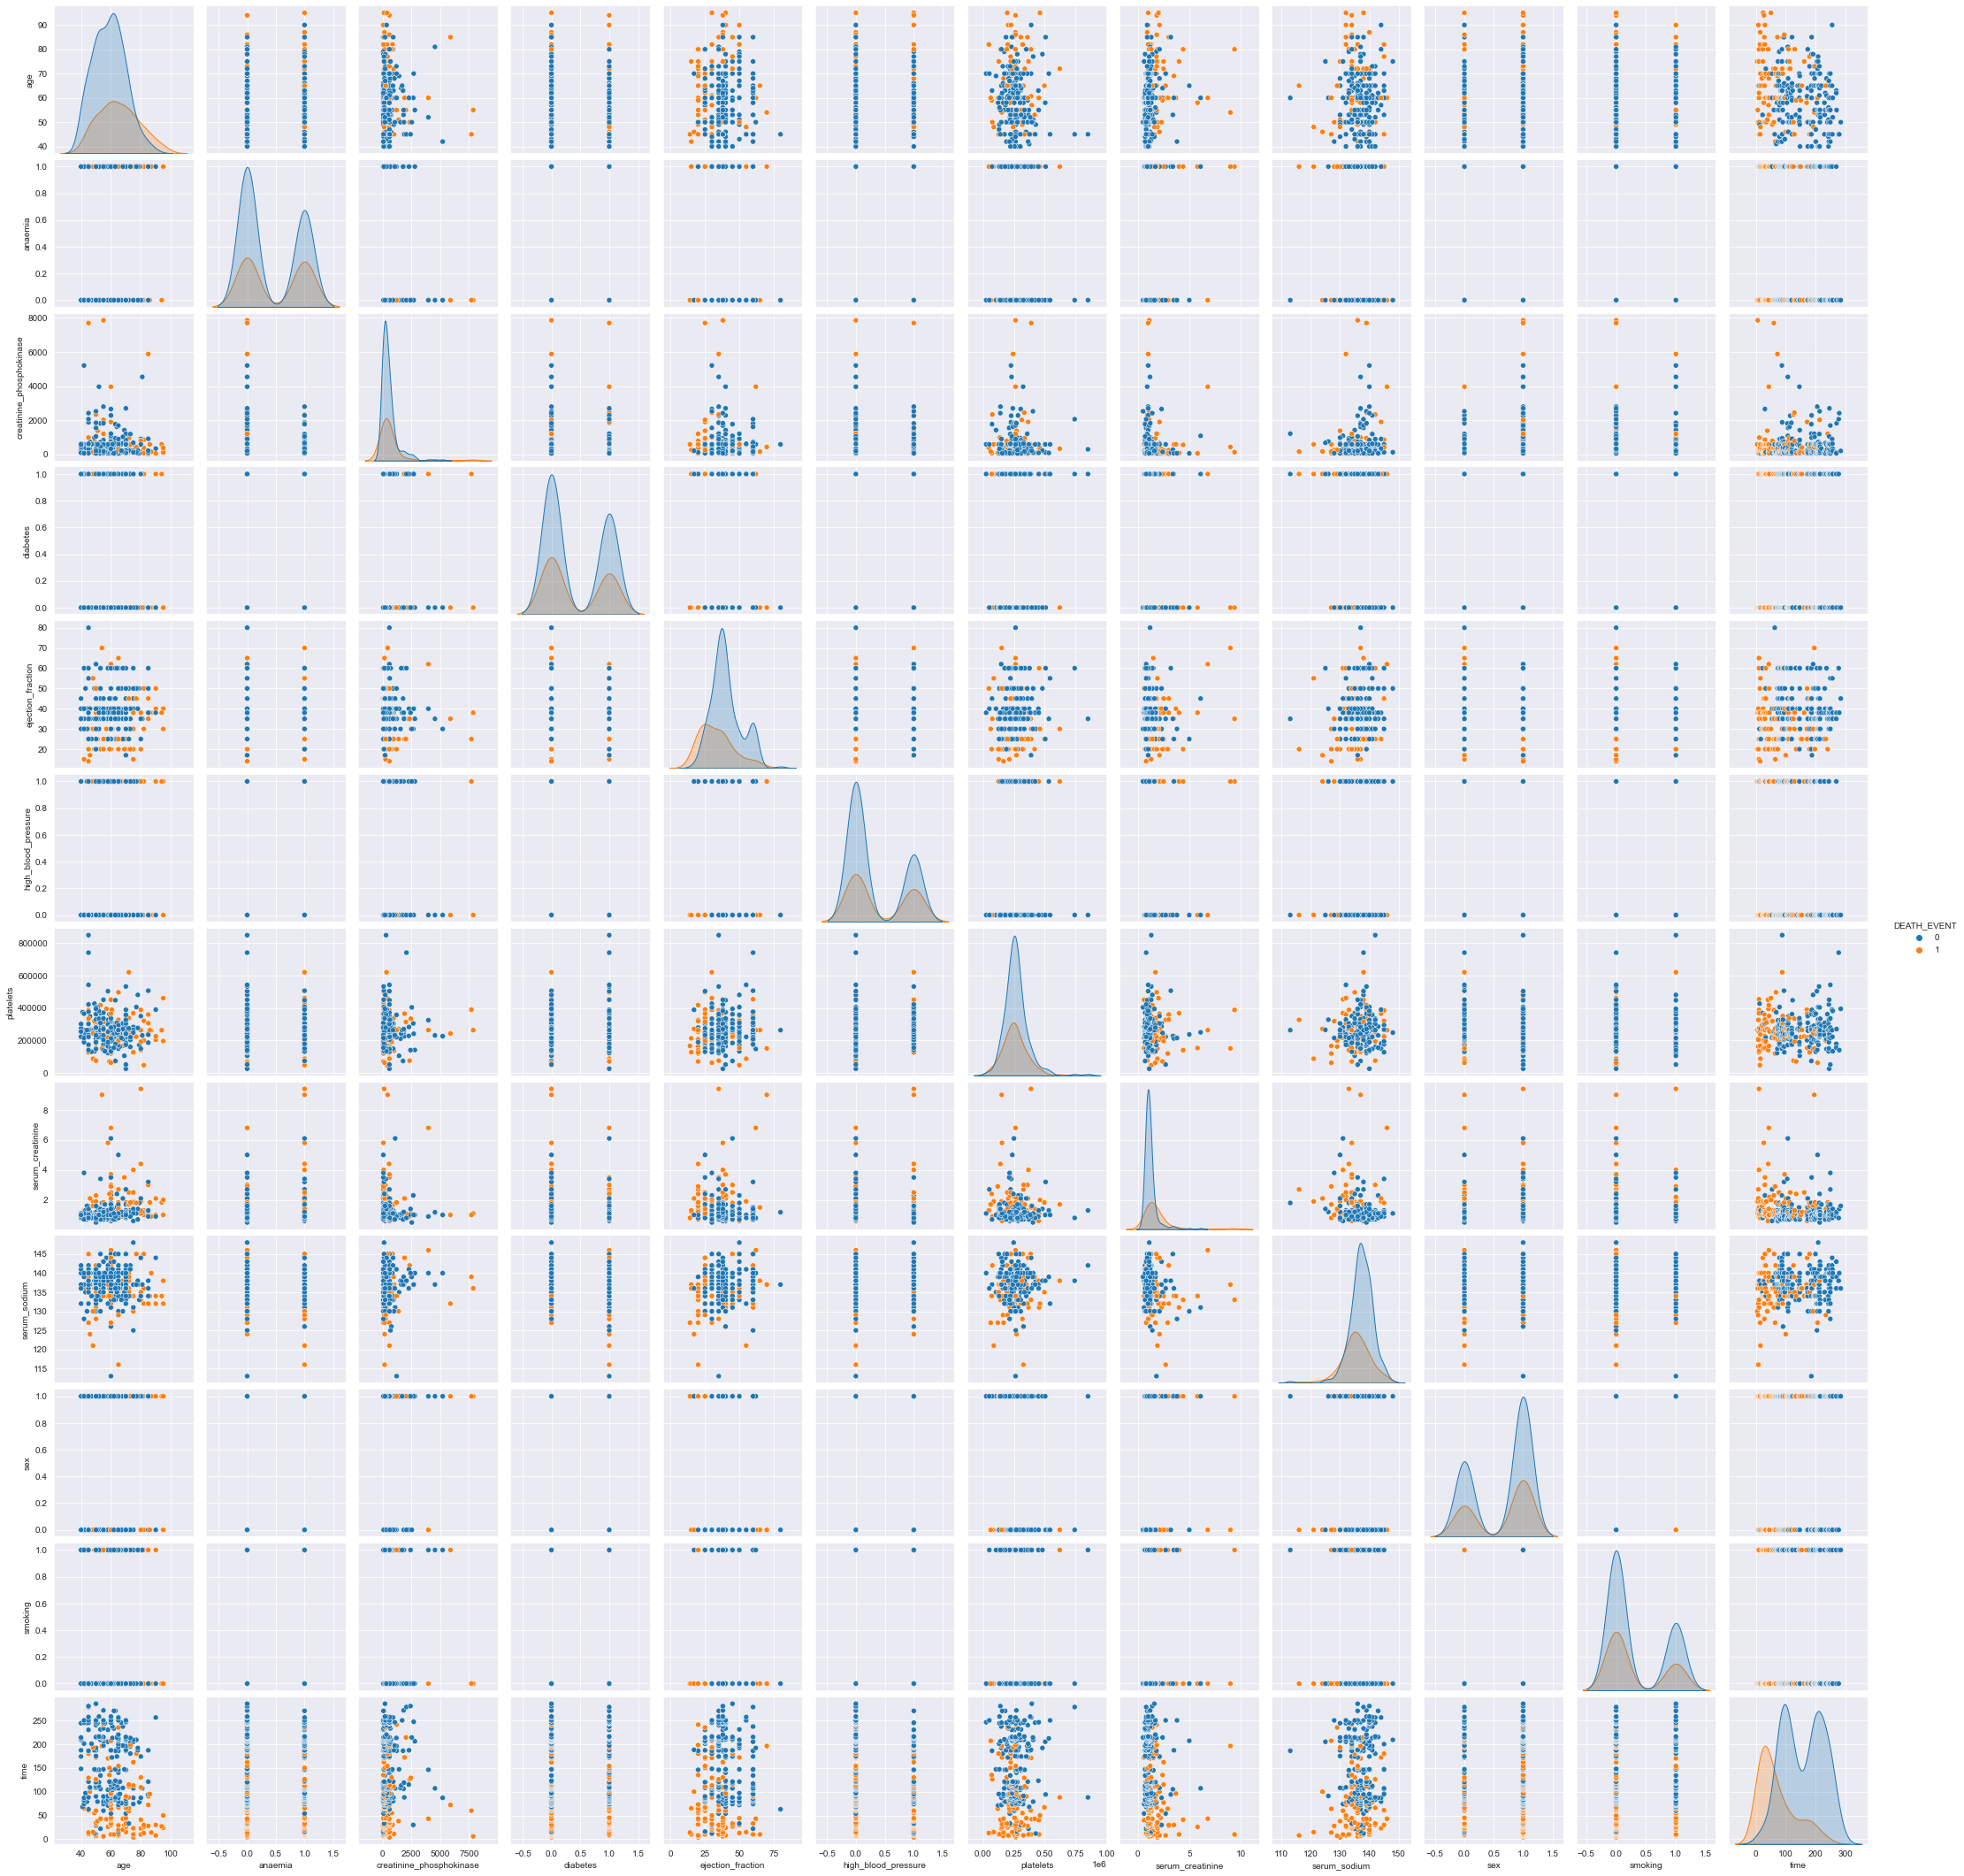

In [63]:
sns.pairplot(data,hue='DEATH_EVENT')

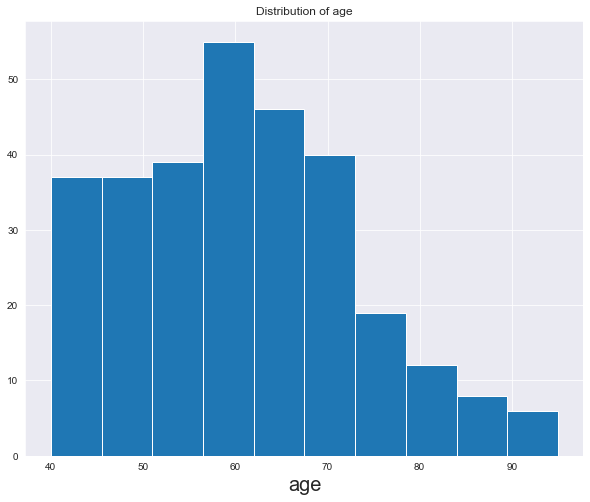

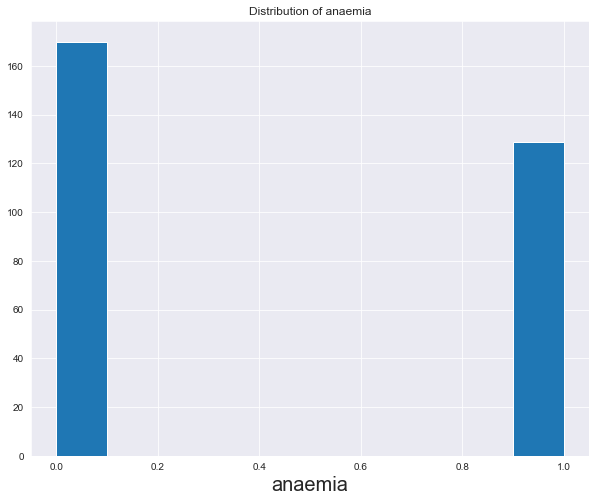

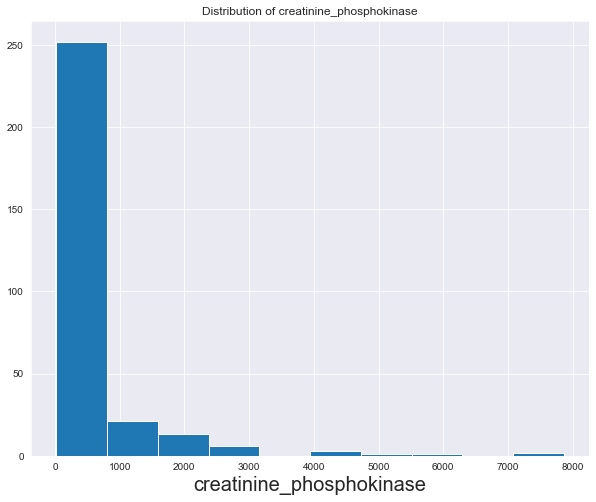

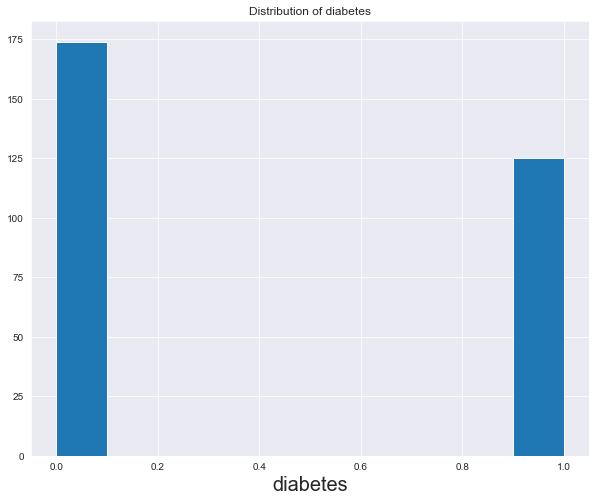

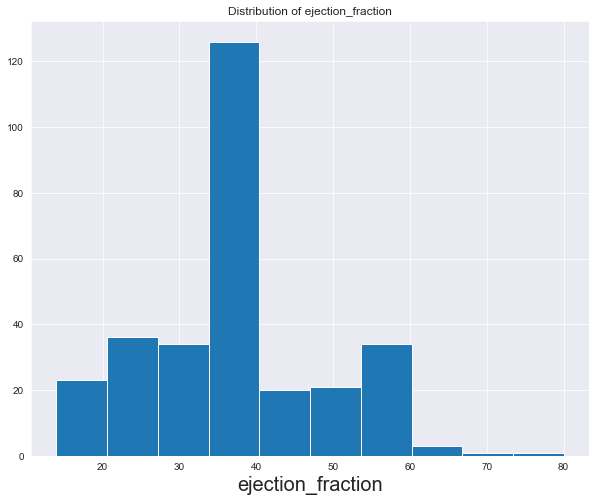

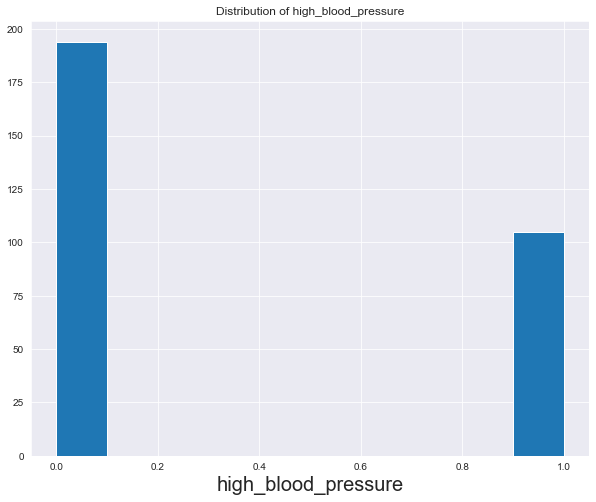

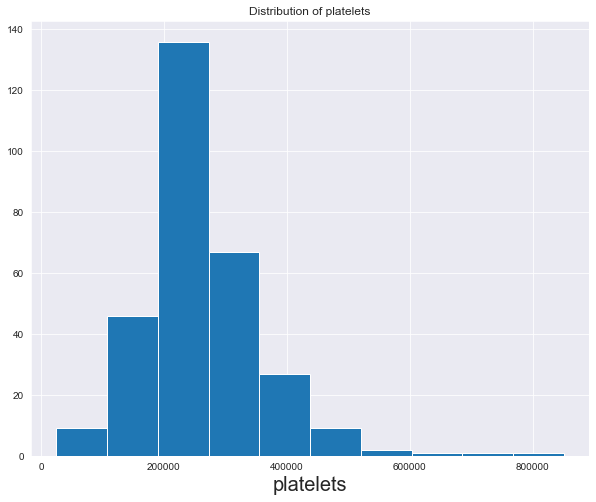

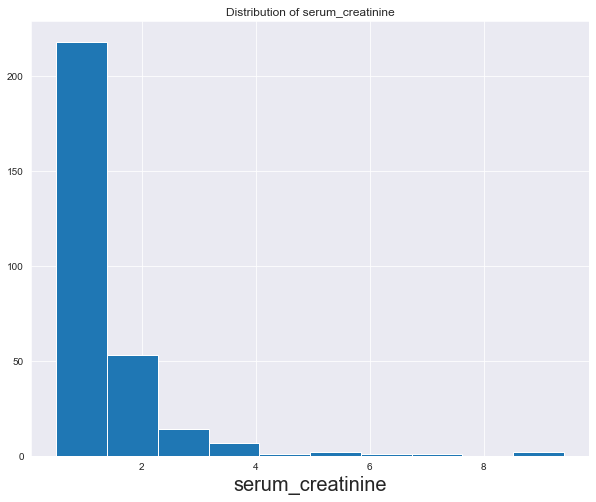

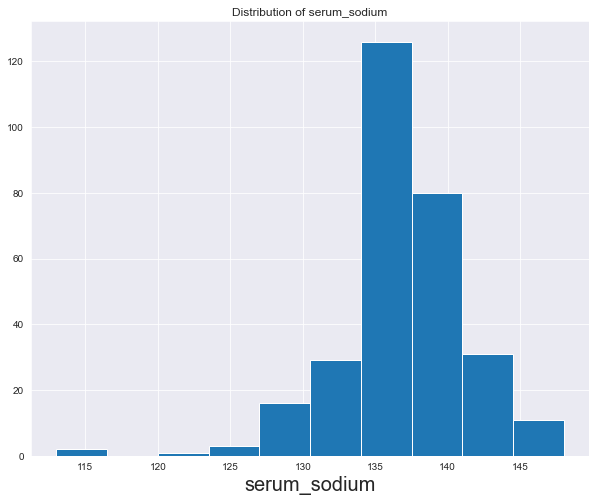

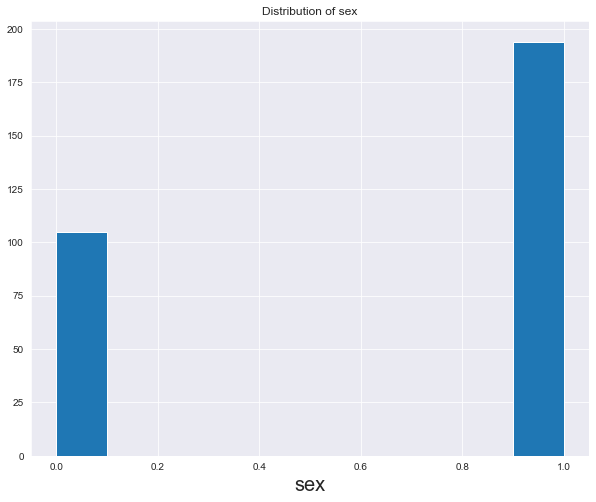

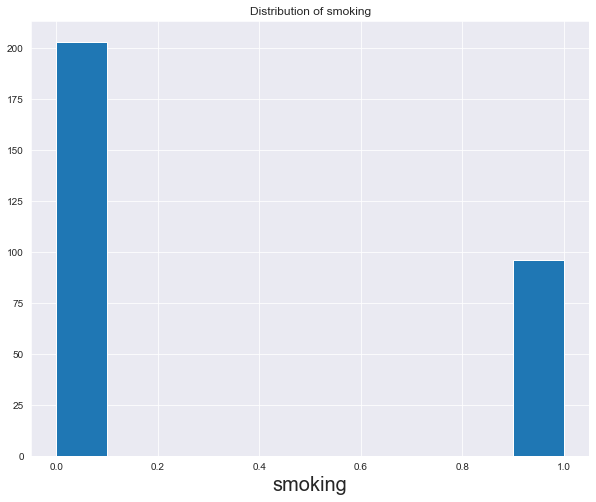

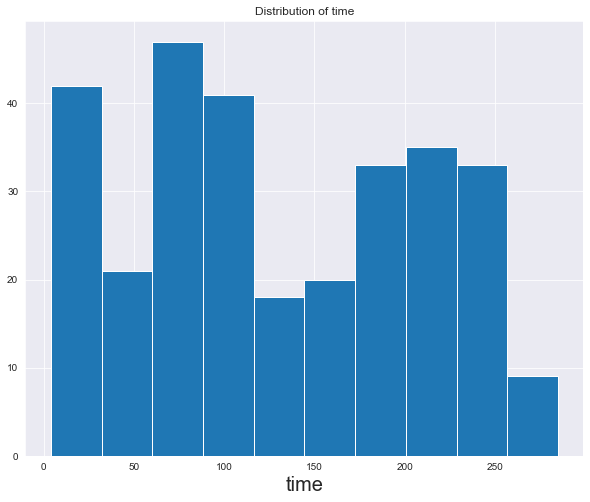

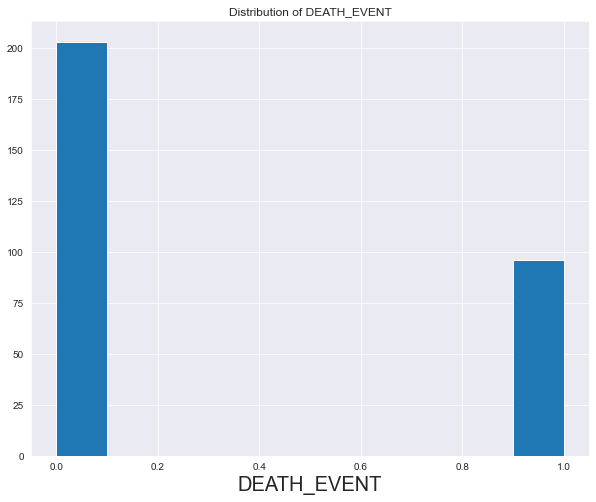

In [9]:
plot_distributions(data)

In [10]:
def gender_analysis(data,plot = True):
    male = data[data['sex'] ==1]
    female = data[data['sex'] ==0]

    survived_male = male[data['DEATH_EVENT'] == 0]
    survived_female = female[data['DEATH_EVENT'] == 0]
    not_survived_male = male[data['DEATH_EVENT'] == 1]
    not_survived_female = female[data['DEATH_EVENT'] == 1]
    
    event_list = [survived_male,survived_female,not_survived_male,not_survived_female]
    a = 0
    x_list = []
    event_list_str = ['survived_male','survived_female','not_survived_male','not_survived_female']
    for i in event_list:
        x = len(i)
        x_list.append(x)
        print(f'Number of {event_list_str[a]} : ',x)
        a = a + 1
    
    if (plot ==True):
        plt.pie(x_list,labels = event_list_str,shadow= True)
        plt.show()
    

Number of survived_male :  132
Number of survived_female :  71
Number of not_survived_male :  62
Number of not_survived_female :  34


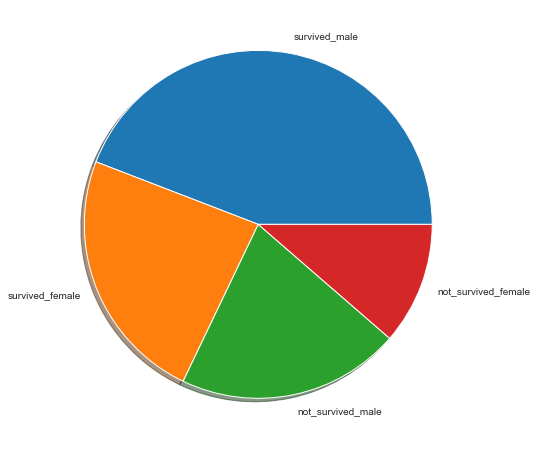

In [11]:
gender_analysis(data,plot = True)

In [12]:
def diabetes_analysis(data, plot = True):
    diabetes = data[data['diabetes'] ==1]
    not_diabetes = data[data['diabetes'] ==0]

    survived_diabetes = diabetes[data['DEATH_EVENT'] == 0]
    survived_not_diabetes = not_diabetes[data['DEATH_EVENT'] == 0]
    not_survived_diabetes = diabetes[data['DEATH_EVENT'] == 1]
    not_survived_not_diabetes = not_diabetes[data['DEATH_EVENT'] == 1]
    
    event_list = [survived_diabetes,survived_not_diabetes,not_survived_diabetes,not_survived_not_diabetes]
    a = 0
    x_list = []
    event_list_str = ['survived_diabetes','survived_not_diabetes','not_survived_diabetes','not_survived_not_diabetes']
    for i in event_list:
        x = len(i)
        x_list.append(x)
        print(f'Number of {event_list_str[a]} : ',x)
        a = a + 1
    
    if (plot ==True):
        plt.pie(x_list,labels = event_list_str,shadow= True)
        plt.show()
    

Number of survived_diabetes :  85
Number of survived_not_diabetes :  118
Number of not_survived_diabetes :  40
Number of not_survived_not_diabetes :  56


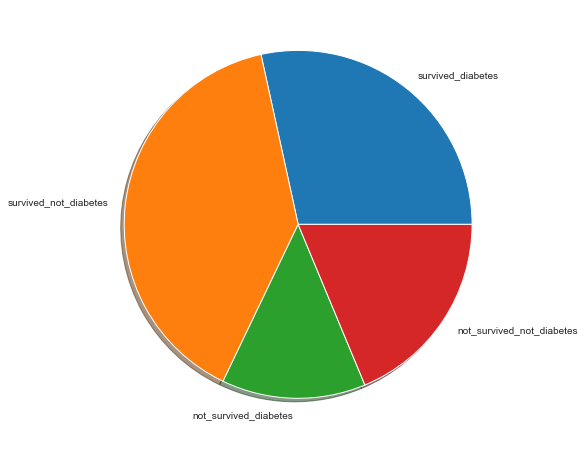

In [13]:
diabetes_analysis(data)

In [14]:
def anaemia_analysis(data, plot = True):
    anaemia = data[data['anaemia'] ==1]
    not_anaemia = data[data['anaemia'] ==0]

    survived_anaemia = anaemia[data['DEATH_EVENT'] == 0]
    survived_not_anaemia = not_anaemia[data['DEATH_EVENT'] == 0]
    not_survived_anaemia = anaemia[data['DEATH_EVENT'] == 1]
    not_survived_not_anaemia = not_anaemia[data['DEATH_EVENT'] == 1]
    
    event_list = [survived_anaemia,survived_not_anaemia,not_survived_anaemia,not_survived_not_anaemia]
    a = 0
    x_list = []
    event_list_str = ['survived_anaemia','survived_not_anaemia','not_survived_anaemia','not_survived_not_anaemia']
    for i in event_list:
        x = len(i)
        x_list.append(x)
        print(f'Number of {event_list_str[a]} : ',x)
        a = a + 1
    
    if (plot ==True):
        plt.pie(x_list,labels = event_list_str,shadow= True)
        plt.show()

Number of survived_anaemia :  83
Number of survived_not_anaemia :  120
Number of not_survived_anaemia :  46
Number of not_survived_not_anaemia :  50


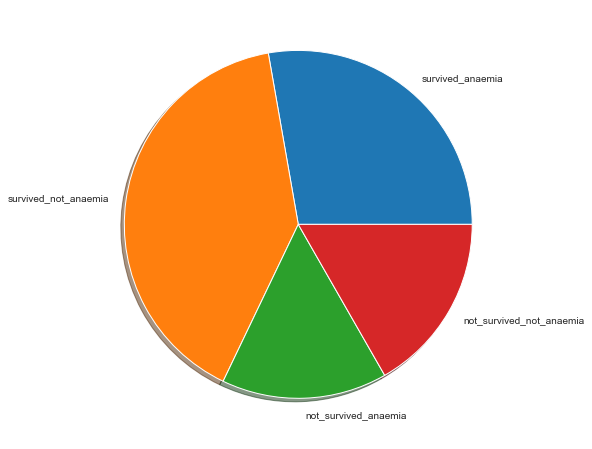

In [15]:
anaemia_analysis(data)

In [16]:
def High_BP_analysis(data, plot = True):
    High_BP = data[data['high_blood_pressure'] ==1]
    not_High_BP = data[data['high_blood_pressure'] ==0]

    survived_High_BP = High_BP[data['DEATH_EVENT'] == 0]
    survived_not_High_BP = not_High_BP[data['DEATH_EVENT'] == 0]
    not_survived_High_BP = High_BP[data['DEATH_EVENT'] == 1]
    not_survived_not_High_BP = not_High_BP[data['DEATH_EVENT'] == 1]
    
    event_list = [survived_High_BP,survived_not_High_BP,not_survived_High_BP,not_survived_not_High_BP]
    a = 0
    x_list = []
    event_list_str = ['survived_High_BP','survived_not_High_BP','not_survived_High_BP','not_survived_not_High_BP']
    for i in event_list:
        x = len(i)
        x_list.append(x)
        print(f'Number of {event_list_str[a]} : ',x)
        a = a + 1
    
    if (plot ==True):
        plt.pie(x_list,labels = event_list_str,shadow= True)
        plt.show()

Number of survived_High_BP :  66
Number of survived_not_High_BP :  137
Number of not_survived_High_BP :  39
Number of not_survived_not_High_BP :  57


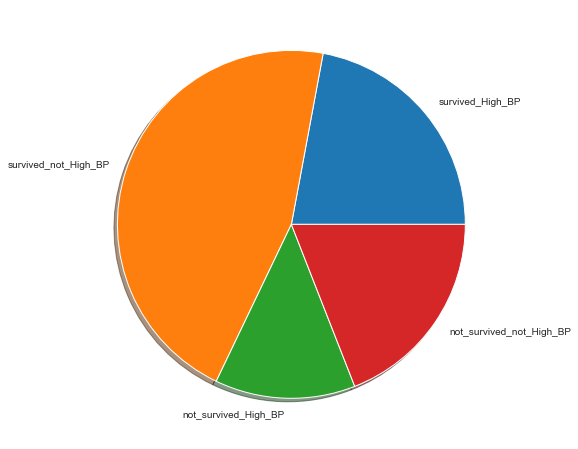

In [17]:
High_BP_analysis(data)

In [18]:
def smoker_analysis(data, plot = True):
    smoker = data[data['smoking'] ==1]
    not_smoker = data[data['smoking'] ==0]

    survived_smoker = smoker[data['DEATH_EVENT'] == 0]
    survived_not_smoker = not_smoker[data['DEATH_EVENT'] == 0]
    not_survived_smoker = smoker[data['DEATH_EVENT'] == 1]
    not_survived_not_smoker = not_smoker[data['DEATH_EVENT'] == 1]
    
    event_list = [survived_smoker,survived_not_smoker,not_survived_smoker,not_survived_not_smoker]
    a = 0
    x_list = []
    event_list_str = ['survived_smoker','survived_not_smoker','not_survived_smoker','not_survived_not_smoker']
    for i in event_list:
        x = len(i)
        x_list.append(x)
        print(f'Number of {event_list_str[a]} : ',x)
        a = a + 1
    
    if (plot ==True):
        plt.pie(x_list,labels = event_list_str,shadow= True)
        plt.show()    

Number of survived_smoker :  66
Number of survived_not_smoker :  137
Number of not_survived_smoker :  30
Number of not_survived_not_smoker :  66


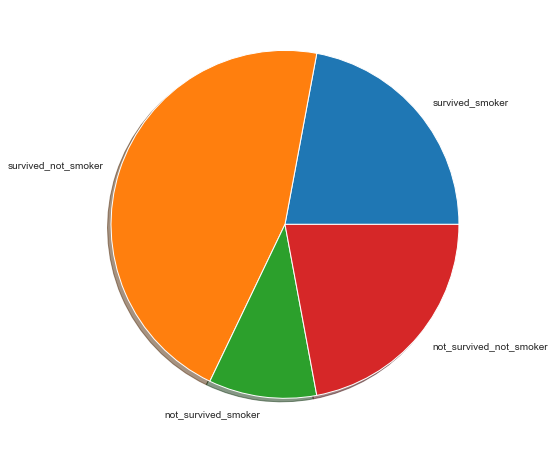

In [19]:
smoker_analysis(data)

Checking Correlation and Drawing Heatmap

In [20]:
corr_matrix = data.corr(method = 'spearman')

<AxesSubplot:>

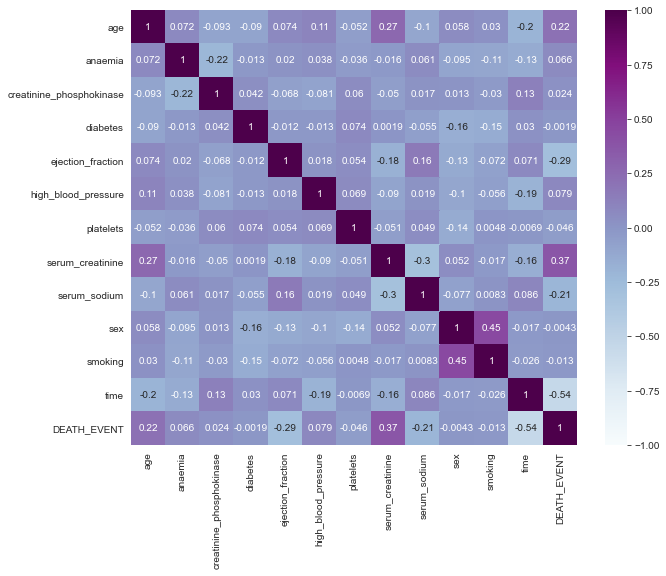

In [21]:
sns.heatmap(corr_matrix,vmin = -1,annot = True,cmap = 'BuPu')

Modeling 

In [33]:
def lr_model_data(data,feature_selection = False):
    if (feature_selection == False):
        y = data['DEATH_EVENT']
        data = data.drop(['DEATH_EVENT','time'],axis = 1)
        x = data
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = LogisticRegression()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Logistic Regression Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score without Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
      
    elif (feature_selection == True): 
        y = data['DEATH_EVENT']
        x = data[['serum_creatinine','serum_sodium','ejection_fraction','age']]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = LogisticRegression()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Logistic Regression Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score with Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
        
        

    
    
    
    
    
    

The shape of x_train,y_train,x_test,y_test are:
(224, 11) (224,) (75, 11) (75,)
The confusion matrix is: [[52  2]
 [16  5]]


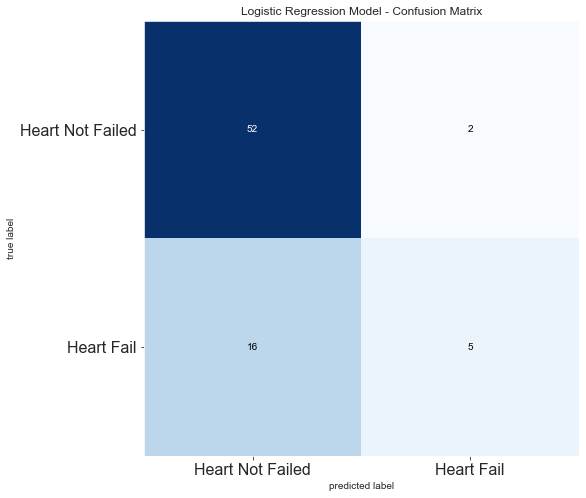

The accuracy score without Feature Selection is:  76.0
The precision score is: 96.29629629629629
The F1 Score is: 85.24590163934427
----------------------------
----------------------------
----------------------------


In [34]:
lr_model_data(data)

The shape of x_train,y_train,x_test,y_test are:
(224, 4) (224,) (75, 4) (75,)
The confusion matrix is: [[50  4]
 [11 10]]


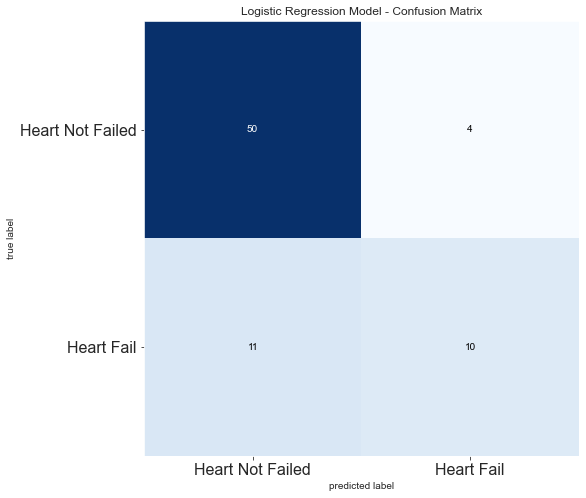

The accuracy score with Feature Selection is:  80.0
The precision score is: 92.5925925925926
The F1 Score is: 86.95652173913044
----------------------------
----------------------------
----------------------------


In [35]:
lr_model_data(data,feature_selection=True)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
import pydotplus


from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [52]:
def dt_model_data(data,feature_selection = False):
    if (feature_selection == False):
        y = data['DEATH_EVENT']
        data = data.drop(['DEATH_EVENT','time'],axis = 1)
        x = data
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = DecisionTreeClassifier()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Decision Tree Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score without Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
        
        

      
    elif (feature_selection == True): 
        y = data['DEATH_EVENT']
        x = data[['serum_creatinine','serum_sodium','ejection_fraction','age']]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = DecisionTreeClassifier()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Decision Tree Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score with Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
        
        

    
    
    
    
    
    

The shape of x_train,y_train,x_test,y_test are:
(224, 11) (224,) (75, 11) (75,)
The confusion matrix is: [[54  0]
 [ 0 21]]


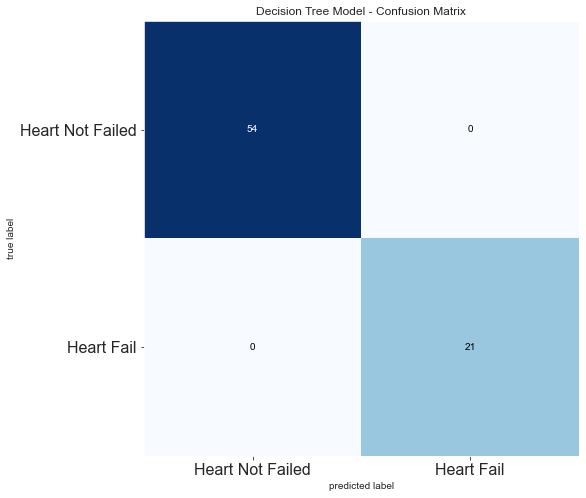

The accuracy score without Feature Selection is:  100.0
The precision score is: 100.0
The F1 Score is: 100.0
----------------------------
----------------------------
----------------------------


In [53]:
dt_model_data(data)

The shape of x_train,y_train,x_test,y_test are:
(224, 4) (224,) (75, 4) (75,)
The confusion matrix is: [[54  0]
 [ 0 21]]


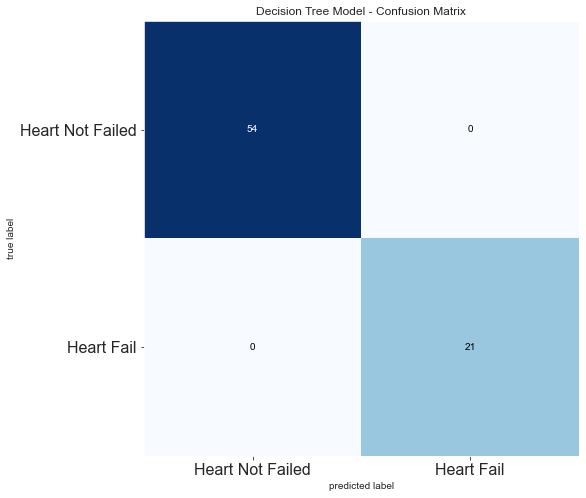

The accuracy score with Feature Selection is:  100.0
The precision score is: 100.0
The F1 Score is: 100.0
----------------------------
----------------------------
----------------------------


In [54]:
dt_model_data(data,feature_selection=True)

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
def nb_model_data(data,feature_selection = False):
    if (feature_selection == False):
        y = data['DEATH_EVENT']
        data = data.drop(['DEATH_EVENT','time'],axis = 1)
        x = data
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = GaussianNB()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Naive Bayes Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score without Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
      
    elif (feature_selection == True): 
        y = data['DEATH_EVENT']
        x = data[['serum_creatinine','serum_sodium','ejection_fraction','age']]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = GaussianNB()
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("Naive Bayes Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score with Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
        
        

    
    
    
    
    
    

The shape of x_train,y_train,x_test,y_test are:
(224, 11) (224,) (75, 11) (75,)
The confusion matrix is: [[52  2]
 [15  6]]


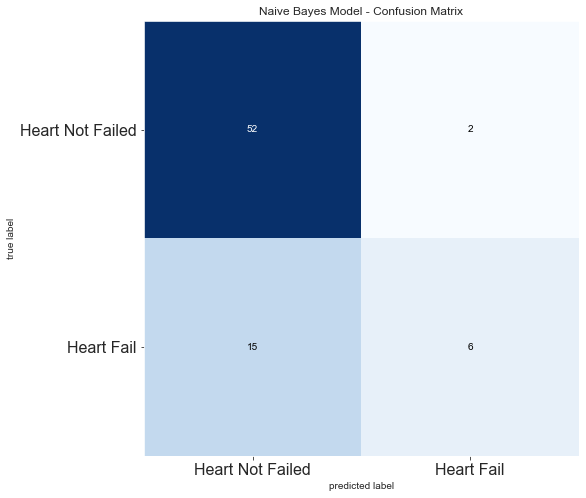

The accuracy score without Feature Selection is:  77.33333333333333
The precision score is: 96.29629629629629
The F1 Score is: 85.95041322314049
----------------------------
----------------------------
----------------------------


In [57]:
nb_model_data(data)

The shape of x_train,y_train,x_test,y_test are:
(224, 4) (224,) (75, 4) (75,)
The confusion matrix is: [[51  3]
 [13  8]]


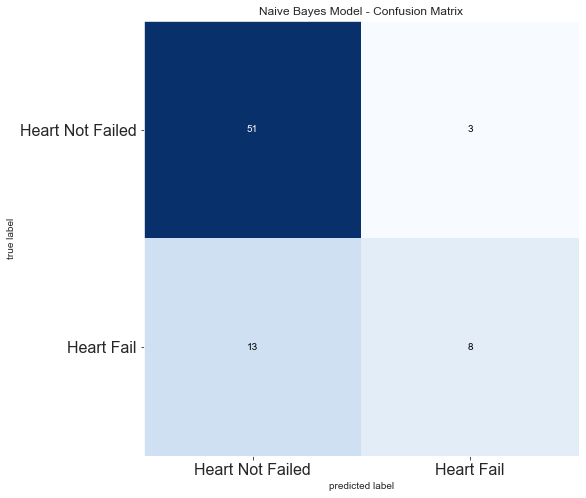

The accuracy score with Feature Selection is:  78.66666666666666
The precision score is: 94.44444444444444
The F1 Score is: 86.44067796610169
----------------------------
----------------------------
----------------------------


In [58]:
nb_model_data(data,feature_selection=True)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
def knn_model_data(data,feature_selection = False):
    if (feature_selection == False):
        y = data['DEATH_EVENT']
        data = data.drop(['DEATH_EVENT','time'],axis = 1)
        x = data
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("KNN Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score without Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
      
    elif (feature_selection == True): 
        y = data['DEATH_EVENT']
        x = data[['serum_creatinine','serum_sodium','ejection_fraction','age']]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 2)
        print('The shape of x_train,y_train,x_test,y_test are:')
        print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(x,y)
        predictions = model.predict(x_test)
        cm = confusion_matrix(y_test,predictions)
        print('The confusion matrix is:',cm)

        plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True)
        plt.title("KNN Model - Confusion Matrix")
        plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
        plt.show()

        print('The accuracy score with Feature Selection is: ',(accuracy_score(y_test,predictions))*100)

        recall = (cm[0][0] / (cm[0][0] + cm[1][0])) * 100
        precision = (cm[0][0] / (cm[0][0] + cm[0][1])) * 100
        F1_score = (2 * precision * recall) / (precision + recall)
        print('The precision score is:',precision)
        print('The F1 Score is:',F1_score)
        print('----------------------------')
        print('----------------------------')
        print('----------------------------')
        
        

    
    
    
    
    
    

The shape of x_train,y_train,x_test,y_test are:
(224, 11) (224,) (75, 11) (75,)
The confusion matrix is: [[50  4]
 [12  9]]


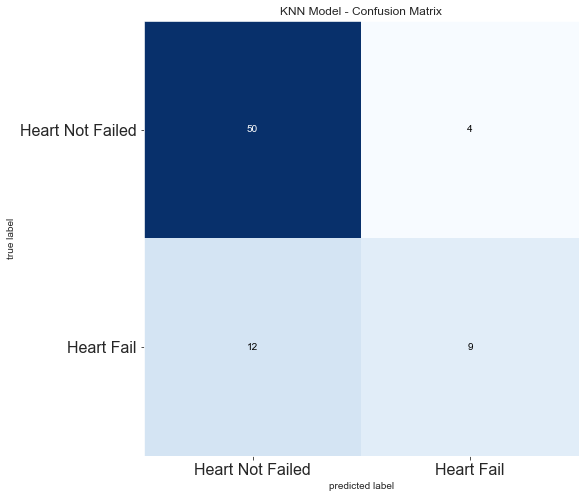

The accuracy score without Feature Selection is:  78.66666666666666
The precision score is: 92.5925925925926
The F1 Score is: 86.20689655172414
----------------------------
----------------------------
----------------------------


In [61]:
knn_model_data(data)

The shape of x_train,y_train,x_test,y_test are:
(224, 4) (224,) (75, 4) (75,)
The confusion matrix is: [[47  7]
 [ 6 15]]


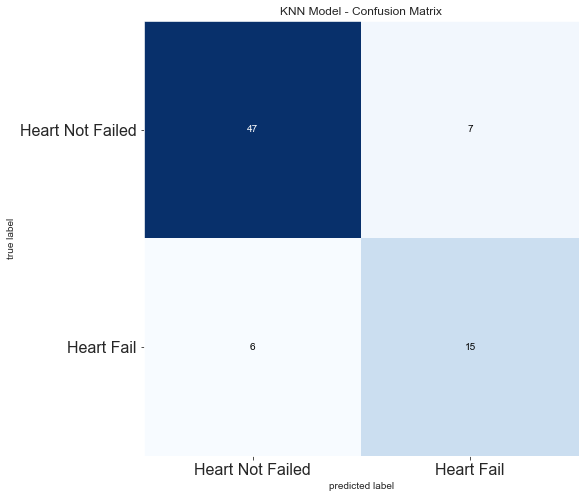

The accuracy score with Feature Selection is:  82.66666666666667
The precision score is: 87.03703703703704
The F1 Score is: 87.85046728971963
----------------------------
----------------------------
----------------------------


In [62]:
knn_model_data(data,feature_selection=True)